In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

In [7]:
import warnings
warnings.simplefilter("ignore")

In [8]:
df=pd.read_csv('train.csv')
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [9]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [10]:
df.drop(columns=["Unnamed: 0","Booking_ID"],inplace=True)

In [11]:
df.shape

(29020, 18)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29020 non-null  int64  
 1   no_of_children                        29020 non-null  int64  
 2   no_of_weekend_nights                  29020 non-null  int64  
 3   no_of_week_nights                     29020 non-null  int64  
 4   type_of_meal_plan                     29020 non-null  object 
 5   required_car_parking_space            29020 non-null  int64  
 6   room_type_reserved                    29020 non-null  object 
 7   lead_time                             29020 non-null  int64  
 8   arrival_year                          29020 non-null  int64  
 9   arrival_month                         29020 non-null  int64  
 10  arrival_date                          29020 non-null  int64  
 11  market_segment_

In [13]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(7661)

In [15]:
#dropping duplicate values

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(21359, 18)

In [18]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [19]:
df["no_of_adults"].value_counts() #do check for all columns

no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64

In [20]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

Our dataset is imbalanced

In [21]:
#Categorizing columns to categorical and numerical
cat_cols=[
    'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved','market_segment_type', 'repeated_guest',
       'booking_status'
]

num_cols=['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'
]

In [22]:
len(cat_cols),len(num_cols)

(6, 12)

### Data Analysis (EDA)


In [23]:
data=df.copy()

In [24]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


#### UNIVARIATE ANALYSIS

In [25]:
def num_plot_dist(df,num_features):
    fig,axes=plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        axes=[axes]
    
    for i,column in enumerate(num_features):
        sns.histplot(data=df,x=column,ax=axes[i][0],kde=True,palette="Blues")
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df,x=column,ax=axes[i][1],palette="Blues")
        axes[i][1].set_title(f"Box plot for {column}")

    plt.tight_layout()
    plt.show()

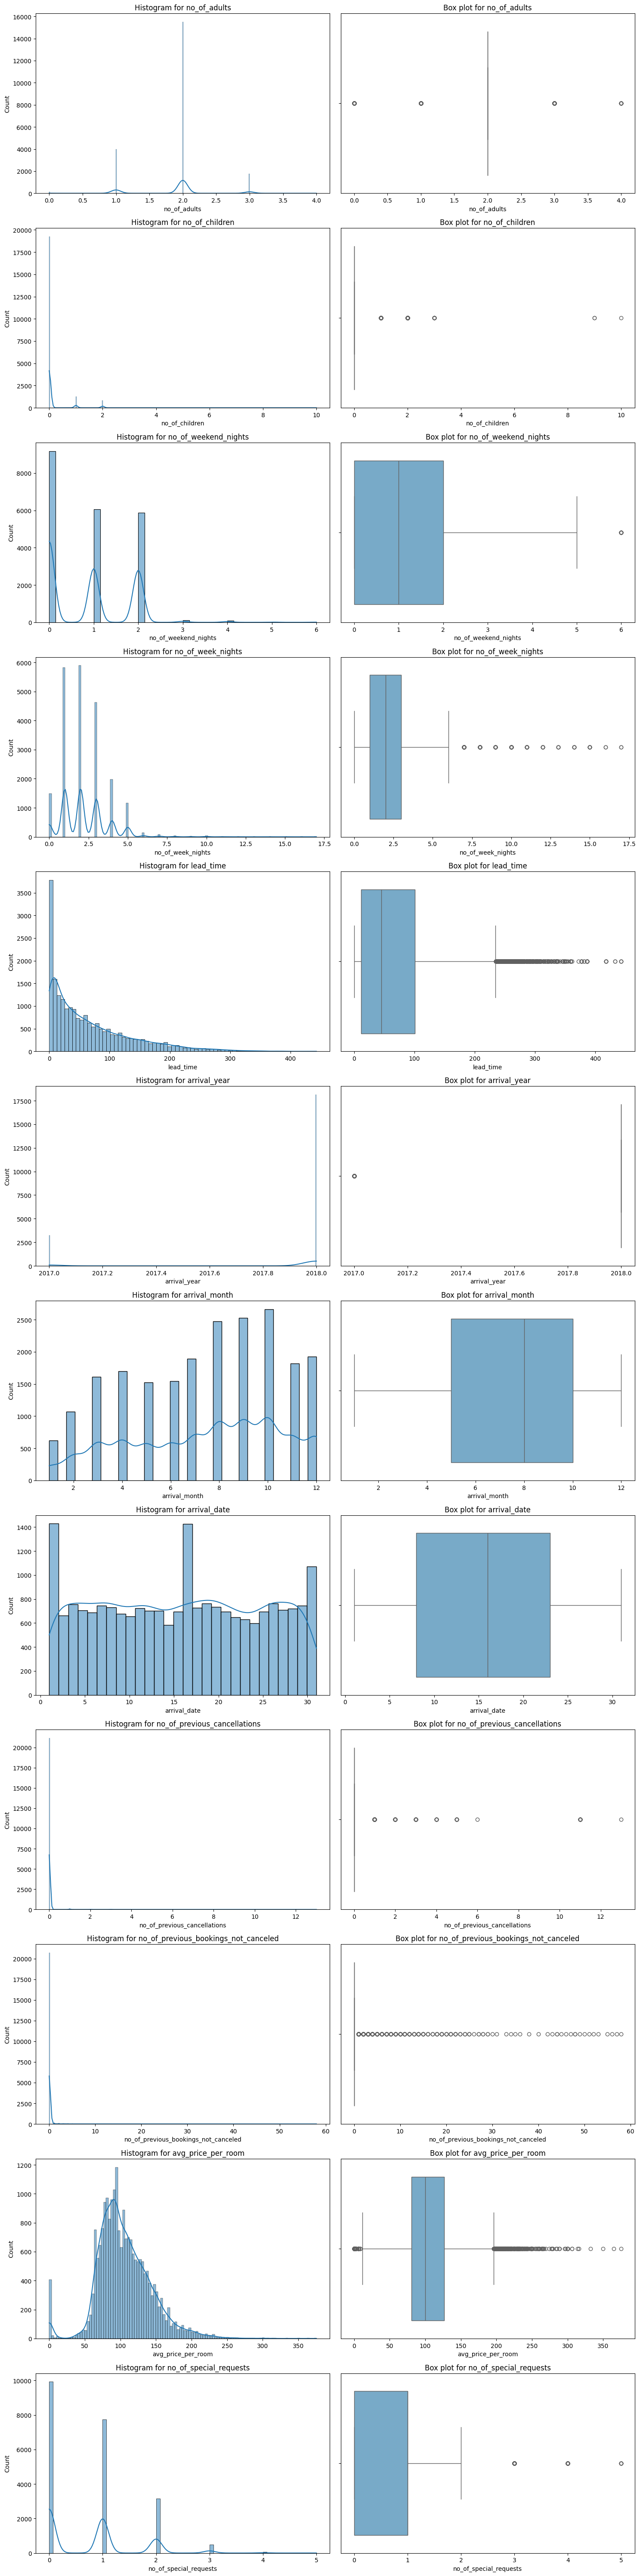

In [26]:
num_plot_dist(data,num_cols)

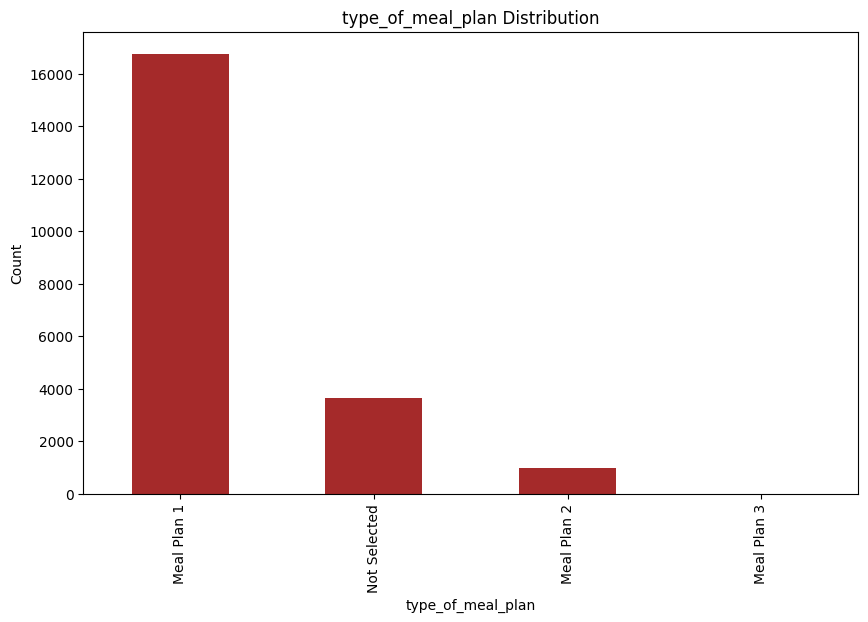

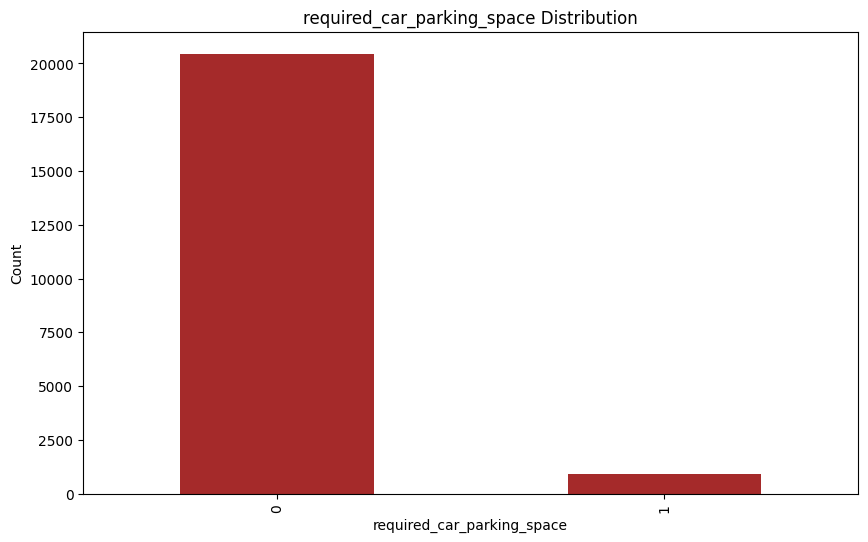

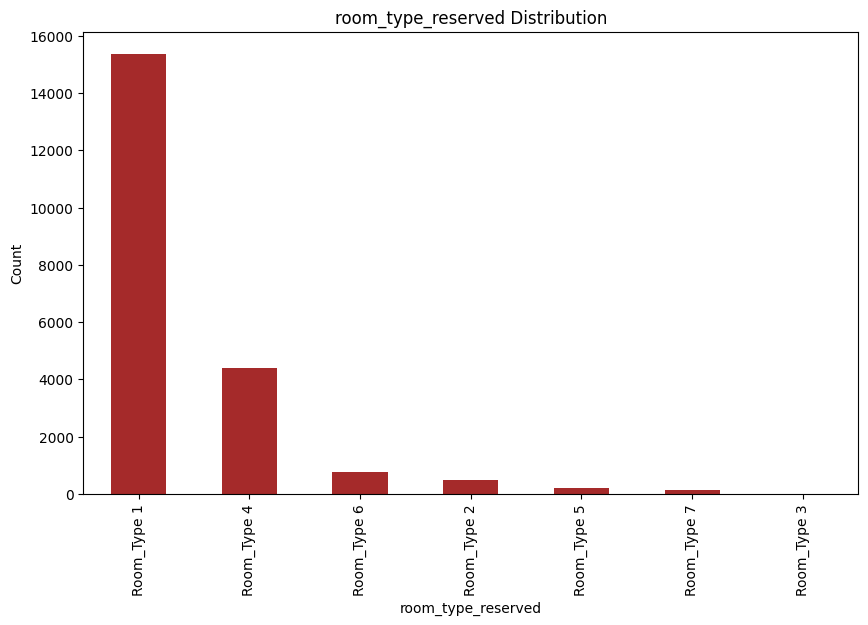

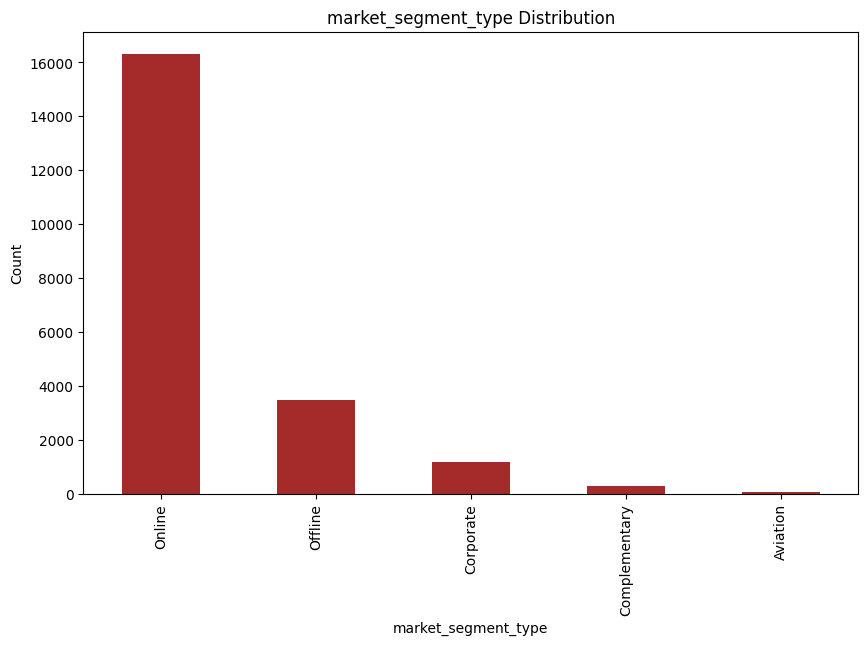

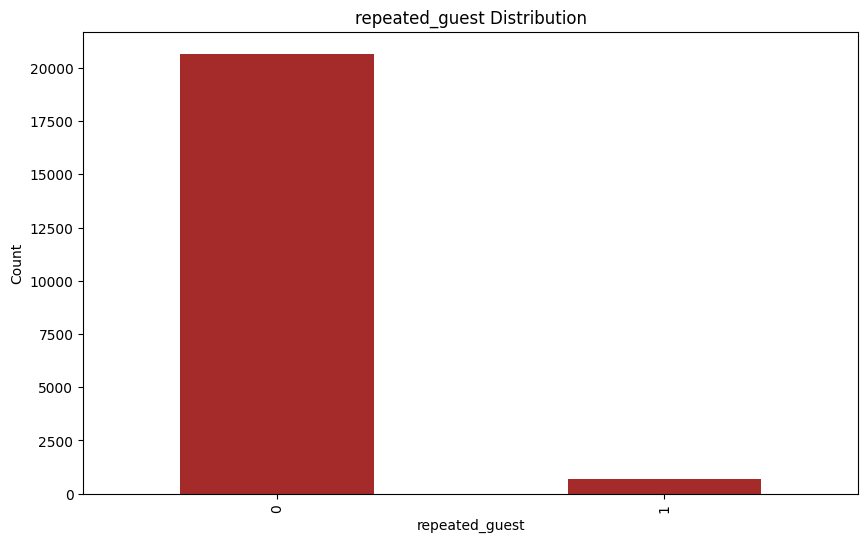

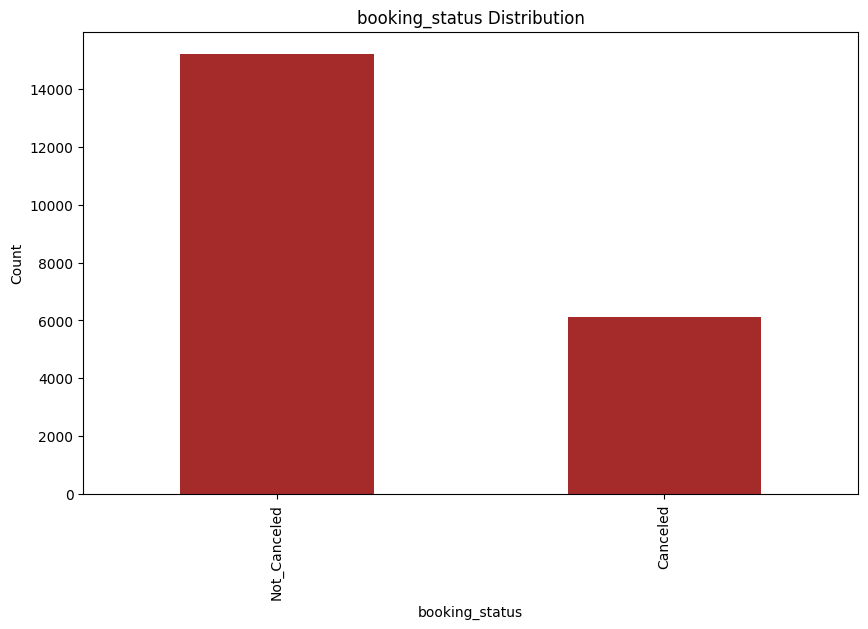

In [27]:
#Caategorical Columns
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar',color='brown')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()


### Bivariate Analysis

In [28]:
def plot_bivariate_num(df,target,num_features):
    num_plots=len(num_features)
    num_rows=(num_plots+1)//2

    fig,axes=plt.subplots(num_rows,2,figsize=(15,num_rows*5))
    axes=axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(x=target,y=column,ax=axes[i],data=df,palette="Blues")
        axes[i].set_title(f"{column} VS {target}")

    plt.tight_layout()
    plt.show()

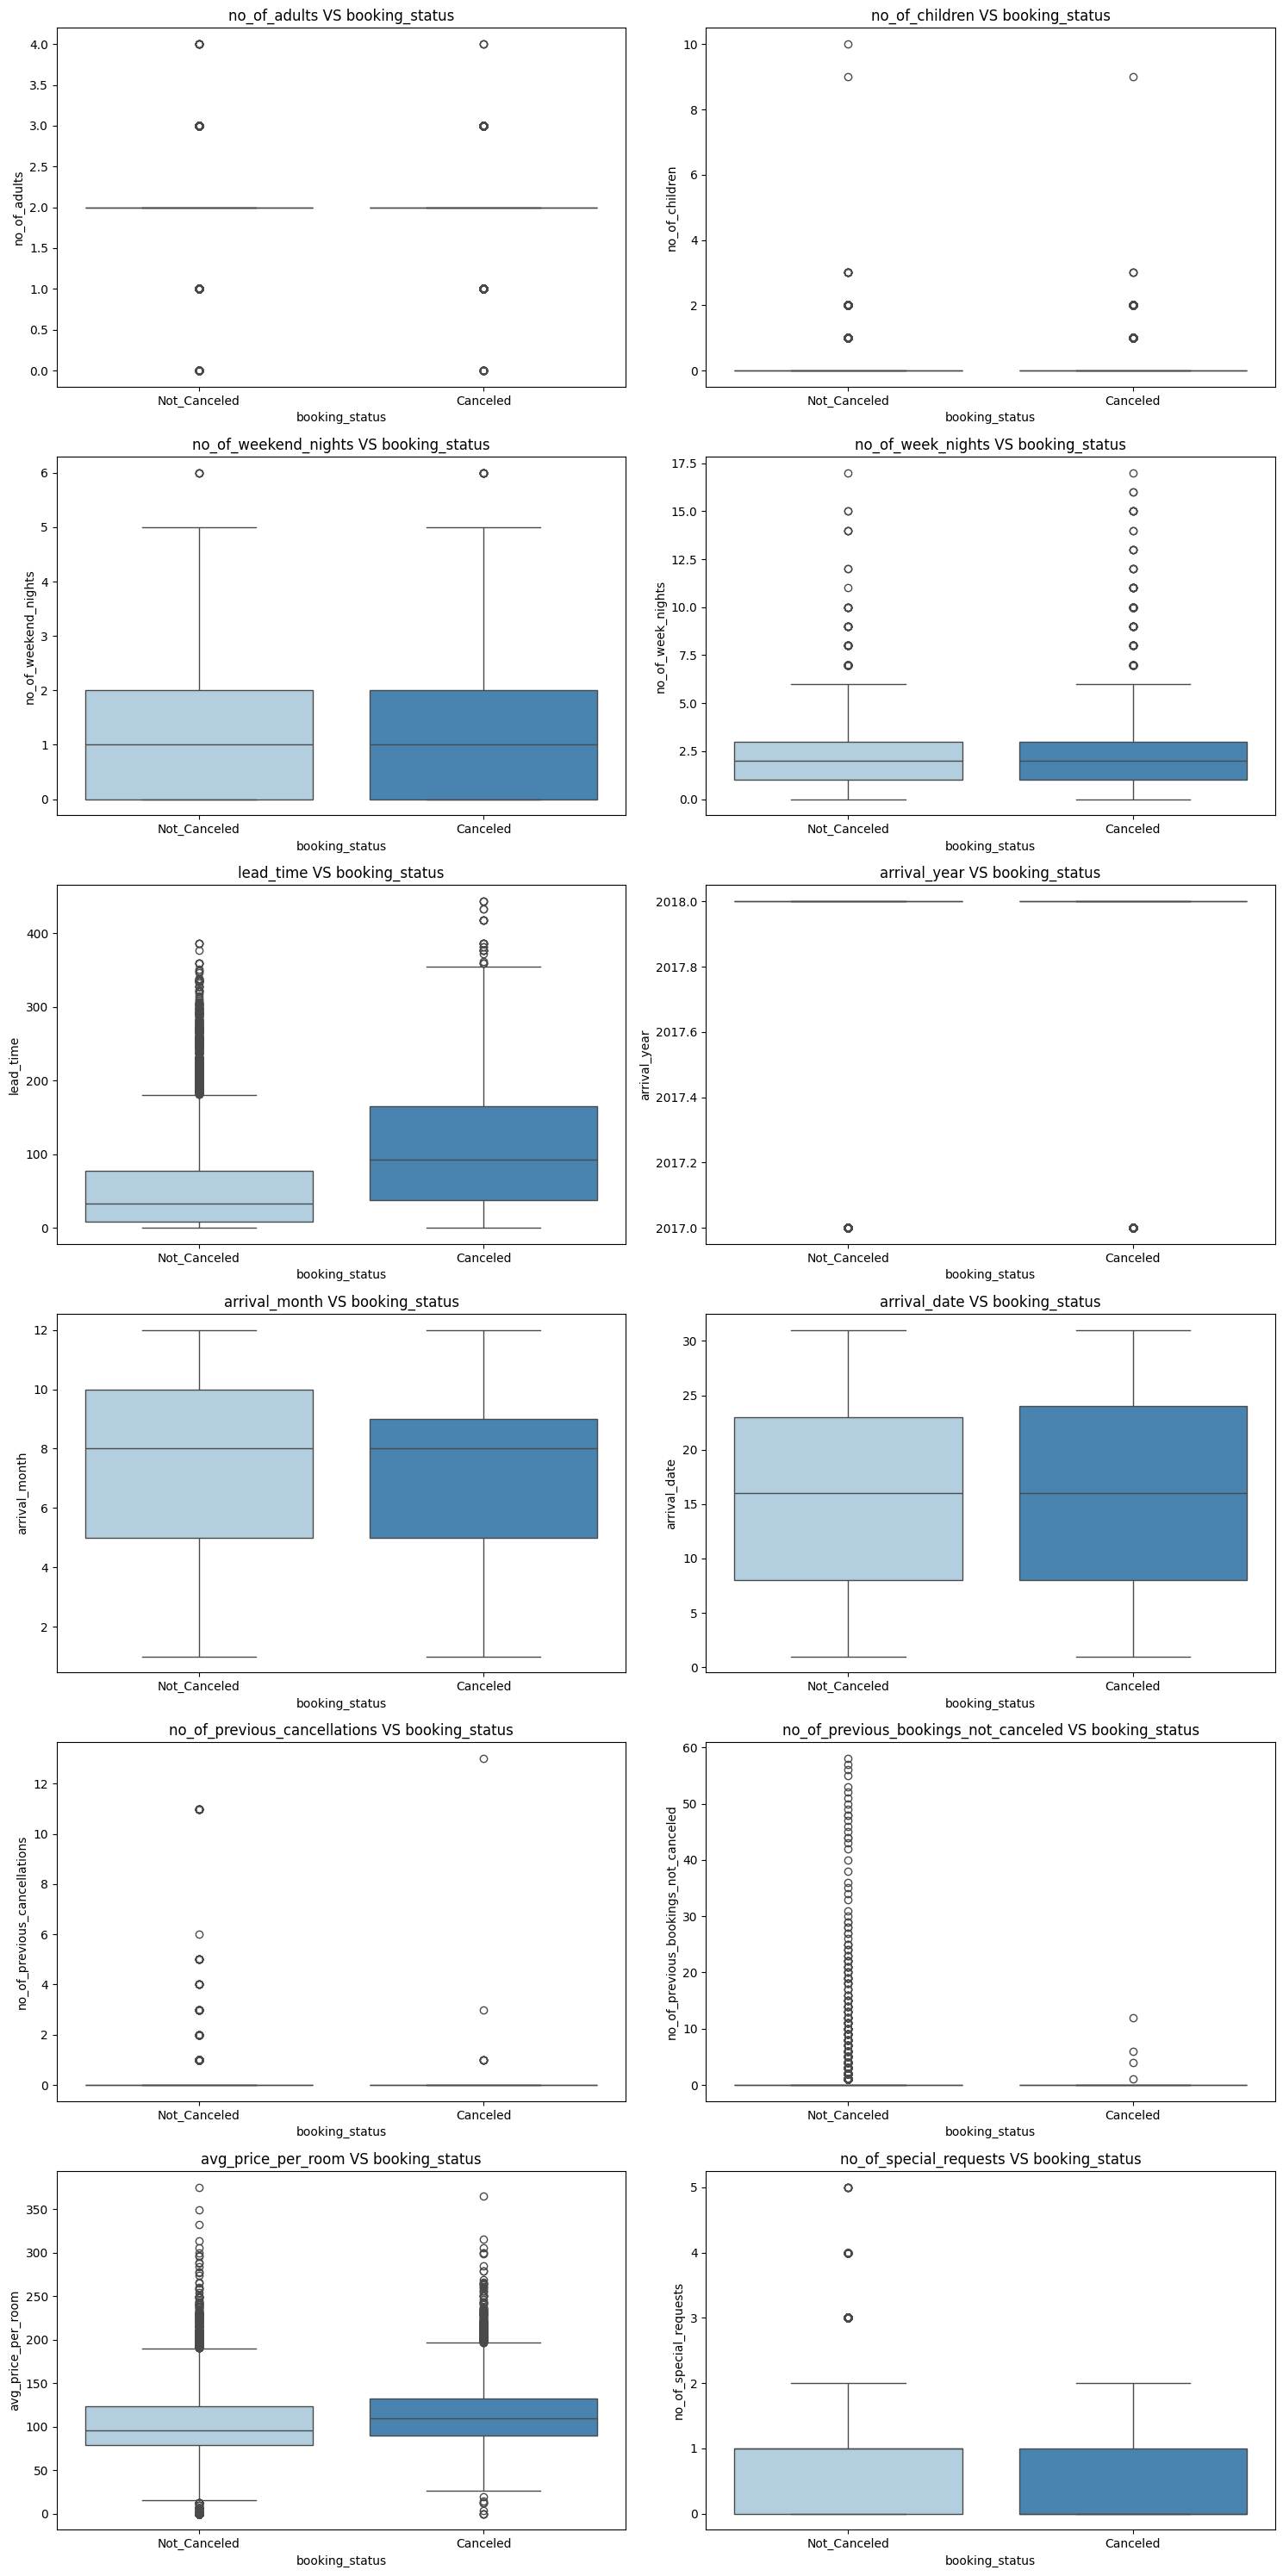

In [29]:
plot_bivariate_num(data,'booking_status',num_cols)

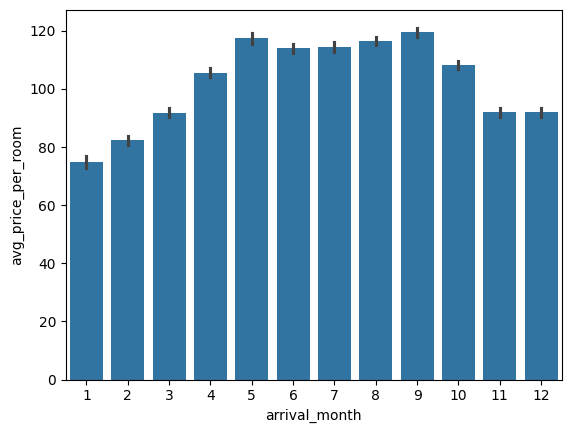

In [30]:
sns.barplot(data=data,x='arrival_month',y='avg_price_per_room')
plt.show()

The above graph tells that the distribution of 'arival_month VS persons' and 'arrival_motnj VS avg_price_per_room' looks same, hence the hotel gradually increases/decreases the price in the month as per the number of customers.

In [31]:
#bivariate Analysis of Categorical features
def plot_bivariate_cat(df,target,cat_features):
    num_features=len(cat_feature)
    num_rows=(num_features+1)//2

    fig,axes=plt.subplots(num_rows,2,figsize=(15,num_rows*5))
    axes=axes.flatten()

    for i, feature in enumerate(cat_features):
        sns.countplot(x=feature,hue=target,data=df,palette="Set2",ax=axes[i]) #hue is  used because countplot is used for univariate analysis to use it for bivariate we use the parameter 'hue'
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x',rotation=90)

    plt.tight_layout()
    plt.show()

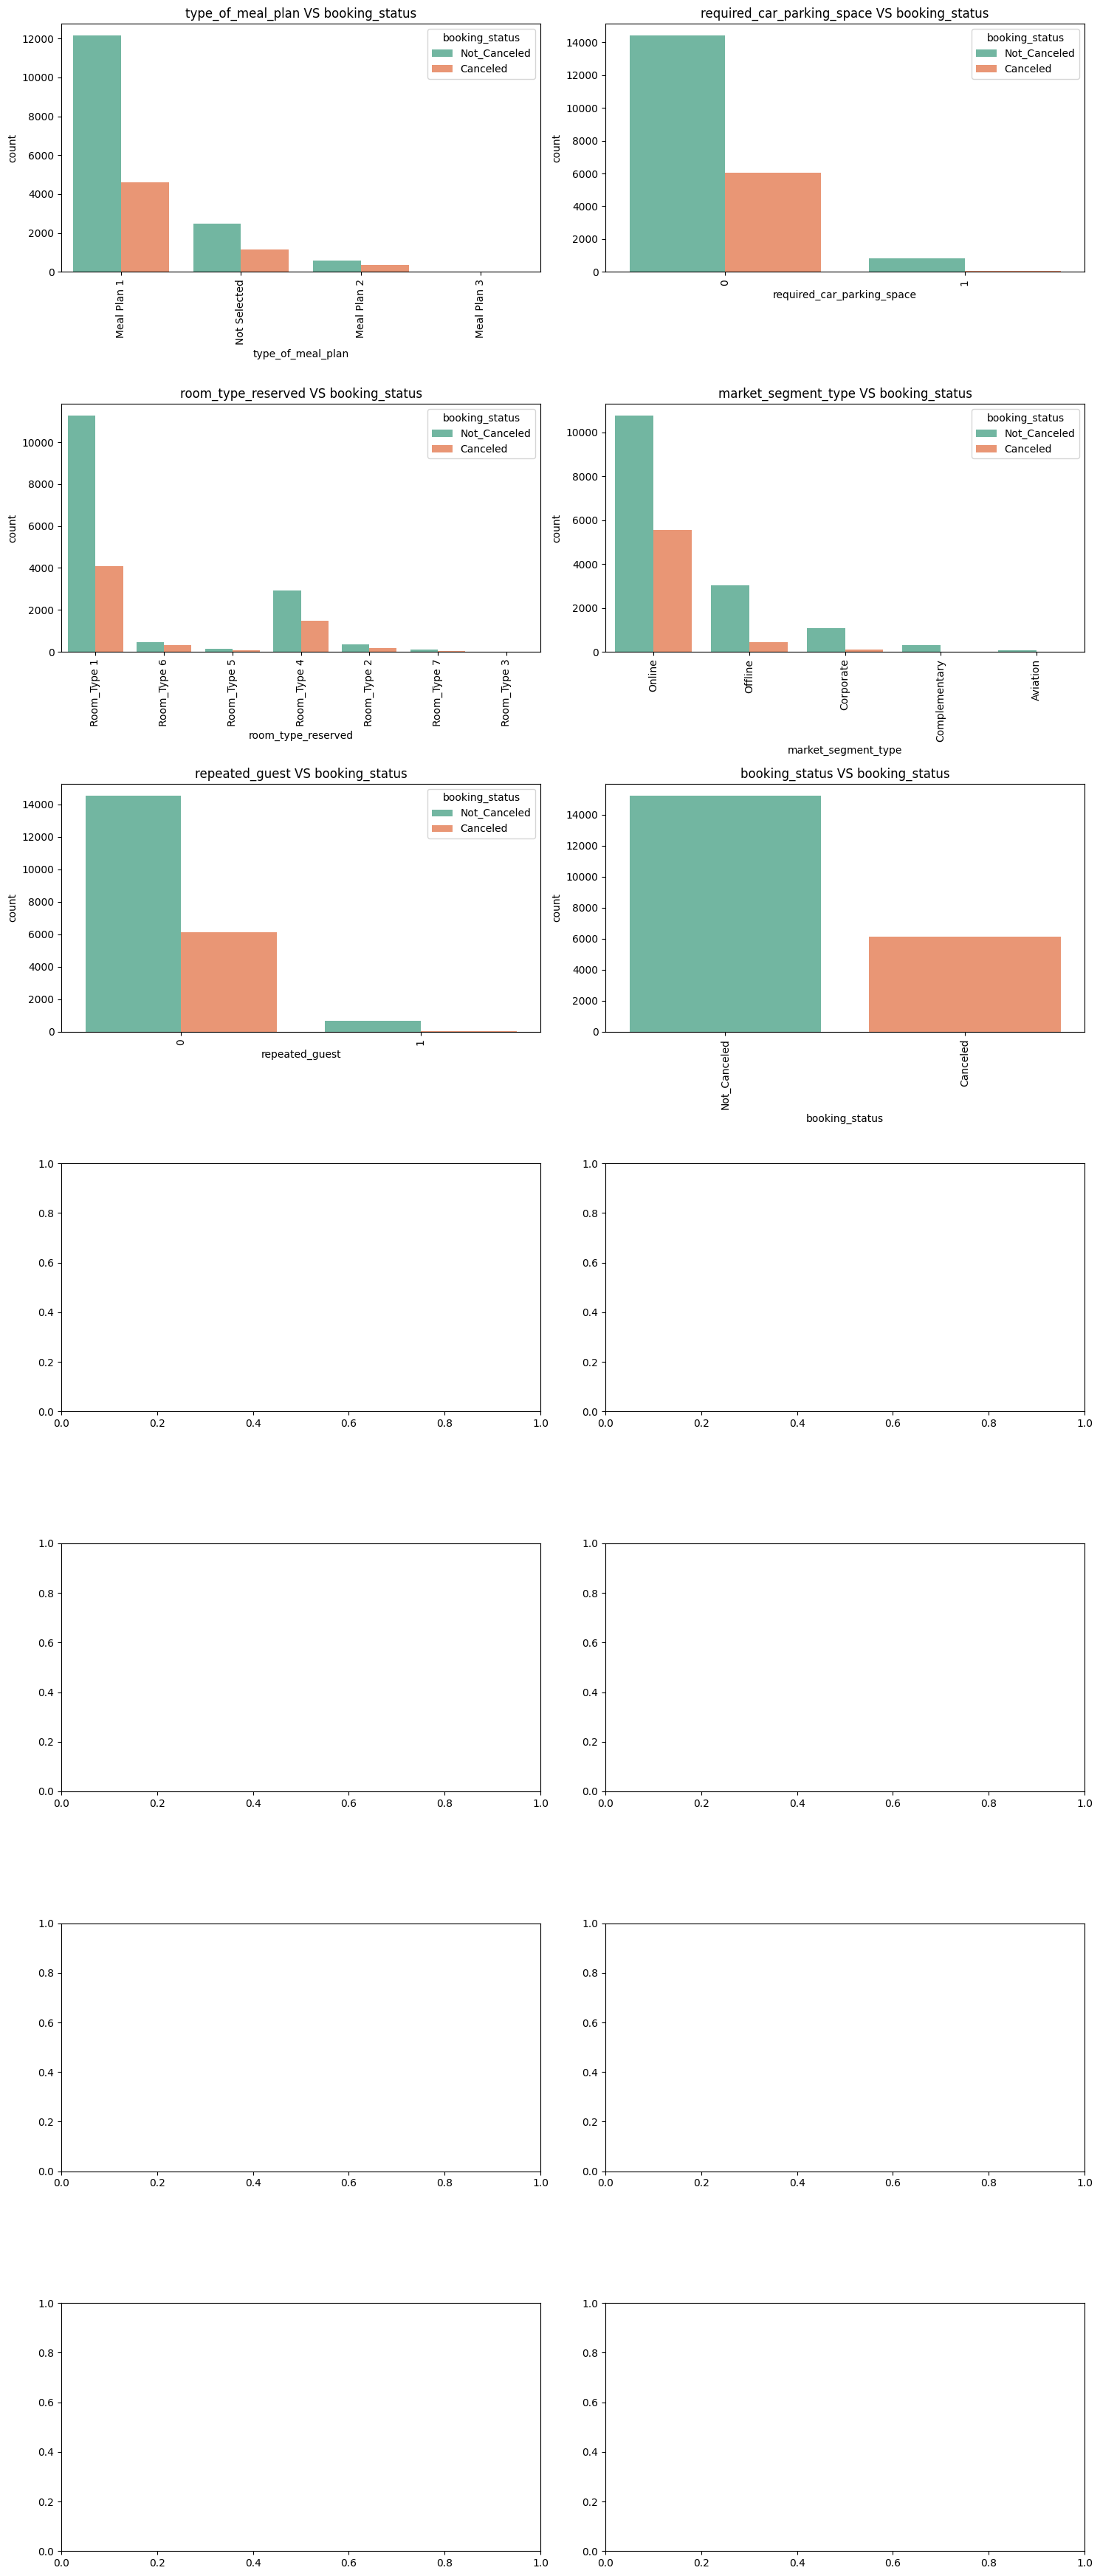

In [32]:
plot_bivariate_cat(data,'booking_status',cat_cols)

### Data PreProcessing

In [33]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [35]:
### Label Encoding
from sklearn.preprocessing import LabelEncoder

In [36]:
encoder=LabelEncoder()
mappings={}

for col in cat_cols:
    df[col]=encoder.fit_transform(df[col])
    mappings[col]={label:code for label,code in zip(encoder.classes_,encoder.transform(encoder.classes_))}


In [37]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [38]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

### Checking for Multi-Colinearity

In [40]:
! pip install statsmodels

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [42]:
x=add_constant(df)

vif_data=pd.DataFrame()

vif_data["feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

In [43]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


if *VIF* >5 then our data is facing multicollinearity. Hence, our data doesn't have multicollinearity.

In [44]:
#Correlation
corr=df.corr()
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049738,0.092764,0.114218,-0.005977,0.000419,0.275089,0.150995,0.096366,0.004833,0.018382,0.310783,-0.238974,-0.063739,-0.143903,0.327749,0.156833,-0.097198
no_of_children,-0.049738,1.000000,0.011033,0.019408,-0.102631,0.018089,0.351786,0.010094,0.036248,0.002606,0.027934,0.103359,-0.048678,-0.020954,-0.029112,0.352640,0.099069,-0.060030
no_of_weekend_nights,0.092764,0.011033,1.000000,0.223154,-0.041123,-0.057417,0.029964,0.131240,0.029016,0.011300,0.006921,0.091510,-0.088633,-0.028935,-0.040008,-0.003579,0.013803,-0.067944
no_of_week_nights,0.114218,0.019408,0.223154,1.000000,-0.073247,-0.061798,0.085547,0.223953,0.022199,0.030029,-0.000633,0.116978,-0.115186,-0.033133,-0.051829,0.018420,0.032304,-0.124415
type_of_meal_plan,-0.005977,-0.102631,-0.041123,-0.073247,1.000000,-0.024666,-0.245616,-0.055124,0.094627,0.008576,-0.006094,0.184654,-0.075476,-0.017205,-0.044891,-0.100708,-0.011933,-0.035864
required_car_parking_space,0.000419,0.018089,-0.057417,-0.061798,-0.024666,1.000000,0.016335,-0.046767,0.010158,-0.015330,-0.009352,-0.039210,0.113582,0.026876,0.066665,0.055536,0.075479,0.092511
room_type_reserved,0.275089,0.351786,0.029964,0.085547,-0.245616,0.016335,1.000000,-0.014666,0.090492,0.001906,0.024315,0.089176,-0.045353,-0.013842,-0.024727,0.490983,0.086319,-0.072128
lead_time,0.150995,0.010094,0.131240,0.223953,-0.055124,-0.046767,-0.014666,1.000000,0.169463,0.132140,0.034112,0.140396,-0.148948,-0.053930,-0.087026,-0.044061,-0.012787,-0.368151
arrival_year,0.096366,0.036248,0.029016,0.022199,0.094627,0.010158,0.090492,0.169463,1.000000,-0.322786,0.011340,0.111445,-0.010158,0.011111,0.025551,0.174569,0.000594,-0.149673
arrival_month,0.004833,0.002606,0.011300,0.030029,0.008576,-0.015330,0.001906,0.132140,-0.322786,1.000000,-0.020386,-0.017885,0.001744,-0.043586,-0.003881,0.066156,0.136037,0.015898


<Axes: >

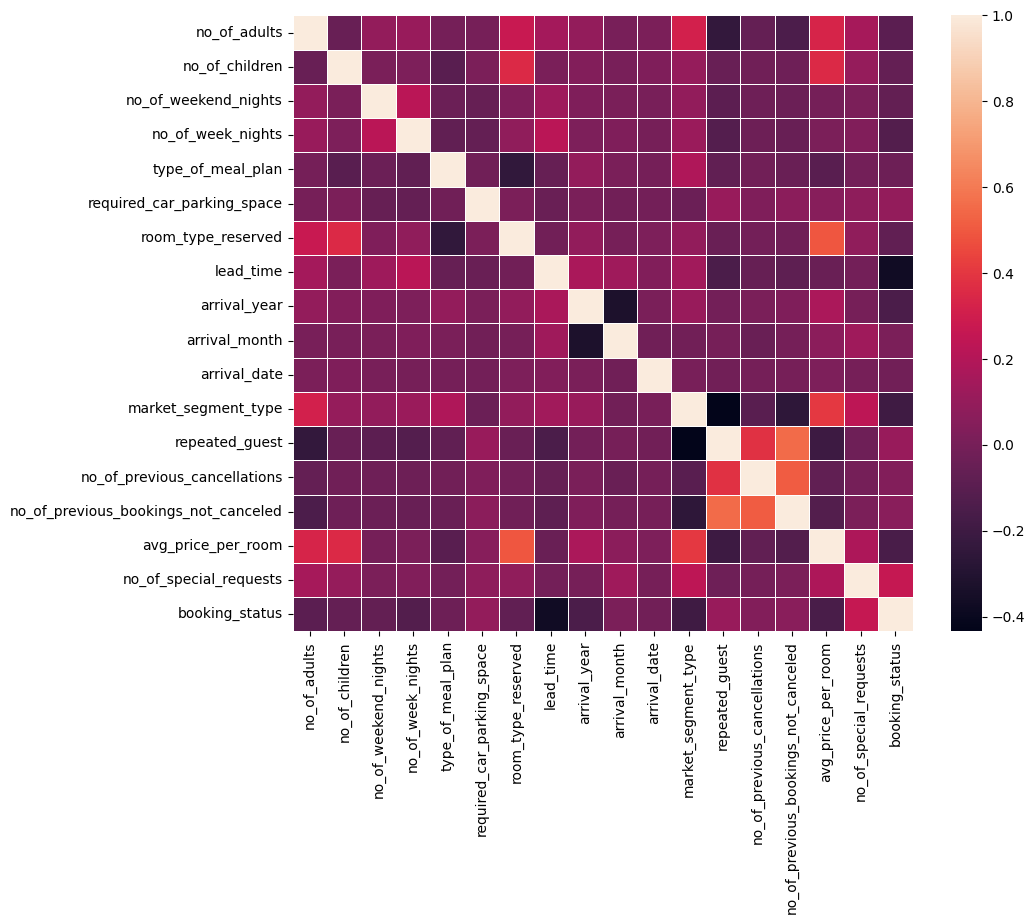

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,linewidths=0.5)

In [46]:
# Cheking Skewness
skewness=df.skew()

In [47]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [48]:
#we need to fix columns with high skewness
for col in df.columns:
    if skewness[col] >5:
        df[col]=np.log1p(df[col]) #applying log transformations to reduce the skewness

### Handling Imbalanced dataset

In [49]:
df['booking_status'].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

There is a huge imbalance in our dataset. So we will use  *SMOTE*

In [50]:
X=df.drop(columns=['booking_status'])
y=df['booking_status']

In [51]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [52]:
!pip install imbalanced-learn

In [53]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [54]:
from imblearn.over_sampling import SMOTE

In [55]:
smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X,y)    #Residual values

In [56]:
X_res.shape,y_res.shape

((30462, 17), (30462,))

In [57]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [58]:
#Creating new dataframe with these new residual values
balanced_df=pd.DataFrame(X_res,columns=X.columns)
balanced_df['booking_status']=y_res


In [59]:
balanced_df.shape

(30462, 18)

In [60]:
df=balanced_df.copy()

In [61]:
df.shape

(30462, 18)

In [62]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


### Feature Selection

In [63]:
X=df.drop(columns='booking_status')
y=df['booking_status']

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
model=RandomForestClassifier(random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [66]:
feature_importance=model.feature_importances_

In [67]:
feature_importance

array([0.01787494, 0.00685469, 0.03022539, 0.04515007, 0.02014955,
       0.01126277, 0.01954414, 0.26273499, 0.01669501, 0.08597531,
       0.08415119, 0.05803913, 0.00655267, 0.00035045, 0.00230537,
       0.14884301, 0.18329131])

In [68]:
feature_importance_df=pd.DataFrame({
    'feature': X.columns,
    'importance':feature_importance
})
top_features_importance_df=feature_importance_df.sort_values(by='importance',ascending=False)

In [69]:
top_features_importance_df

,feature,importance
7,lead_time,0.262735
16,no_of_special_requests,0.183291
15,avg_price_per_room,0.148843
9,arrival_month,0.085975
10,arrival_date,0.084151
11,market_segment_type,0.058039
3,no_of_week_nights,0.045150
2,no_of_weekend_nights,0.030225
4,type_of_meal_plan,0.020150
6,room_type_reserved,0.019544


In [70]:
#Selecting only top 10 features
top_10_features=top_features_importance_df['feature'].head(10).values
top_10_df=df[top_10_features.tolist()+["booking_status"]]

In [71]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.00,10,17,4,1,2,0,0,1
1,98,2,121.50,7,16,4,1,1,0,0,1
2,433,0,70.00,9,8,3,3,0,0,0,0
3,195,0,72.25,8,8,3,5,2,0,0,1
4,188,0,130.00,6,15,3,2,0,0,0,0


In [72]:
top_10_df.shape

(30462, 11)

In [73]:
df=top_10_df.copy()
df.shape

(30462, 11)

### MODEL SELECTION

In [74]:
!pip install xgboost lightgbm

In [75]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [76]:
X=df.iloc[:,:-1]
y=df['booking_status']

In [77]:
X.columns,y

(Index(['lead_time', 'no_of_special_requests', 'avg_price_per_room',
        'arrival_month', 'arrival_date', 'market_segment_type',
        'no_of_week_nights', 'no_of_weekend_nights', 'type_of_meal_plan',
        'room_type_reserved'],
       dtype='object'),
 0        1
 1        1
 2        0
 3        1
 4        0
         ..
 30457    0
 30458    0
 30459    0
 30460    0
 30461    0
 Name: booking_status, Length: 30462, dtype: int64)

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,y_train.shape

((24369, 10), (24369,))

In [79]:
classifiers={
    "RandomForestClassifier" : RandomForestClassifier(random_state=42),
    "AdaBoostClassifier" : AdaBoostClassifier(random_state=42),
    "XGBClassifier" : XGBClassifier(random_state=42),
    "GradientBoostingClassifier" : GradientBoostingClassifier(random_state=42),
    "LogisticRegression" : LogisticRegression(random_state=42),
    "DecisionTreeClassifier" : DecisionTreeClassifier(random_state=42),
    "LGBMClassifier" : LGBMClassifier(random_state=42),
    "SVC" : SVC(random_state=42)
}

In [80]:
metrics={
    "Models" : [],
    "accuracy" : [],
    "precision" : [],
    "recall" : [],
    "f1_score" : []
}

In [81]:
metrics

{'Models': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}

In [82]:
for model_name,classifier in classifiers.items():
    classifier.fit(X_train,y_train)

    y_pred=classifier.predict(X_test)

    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)

    metrics["Models"].append(model_name)
    metrics["accuracy"].append(accuracy)
    metrics["precision"].append(precision)
    metrics["recall"].append(recall)
    metrics["f1_score"].append(f1)

[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [83]:
metric_df=pd.DataFrame(metrics)

In [84]:
metric_df

,Models,accuracy,precision,recall,f1_score
0,RandomForestClassifier,0.893484,0.893659,0.895114,0.894386
1,AdaBoostClassifier,0.804530,0.801025,0.814332,0.807624
2,XGBClassifier,0.871820,0.869074,0.877850,0.873440
3,GradientBoostingClassifier,0.835549,0.819333,0.864169,0.841154
4,LogisticRegression,0.777614,0.802683,0.740717,0.770456
5,DecisionTreeClassifier,0.841950,0.851050,0.831922,0.841377
6,LGBMClassifier,0.862957,0.849546,0.884691,0.866762
7,SVC,0.720335,0.729657,0.706840,0.718068


Training on RandomForestClassifier as it turns out to be our best model


In [85]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [86]:
X=df.iloc[:,:-1]
y=df['booking_status']

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,y_train.shape

((24369, 10), (24369,))

In [88]:
rf=RandomForestClassifier(random_state=42)

In [89]:
params_dist={
    'n_estimators' : randint(100,500),
    'max_depth' : randint(10,50),
    'min_samples_split' : randint(2,10),
    'min_samples_leaf' : randint(1,15),
    'bootstrap' : [True, False]
}

In [90]:
random_search=RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=10,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [91]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=11, min_samples_split=9, n_estimators=288; total time=   5.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=11, min_samples_split=9, n_estimators=288; total time=   5.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=11, min_samples_split=9, n_estimators=288; total time=   5.0s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=11, min_samples_split=9, n_estimators=288; total time=   5.0s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=11, min_samples_split=9, n_estimators=288; total time=   5.1s
[CV] END bootstrap=True, max_depth=48, min_samples_leaf=10, min_samples_split=4, n_estimators=314; total time=   5.5s
[CV] END bootstrap=True, max_depth=48, min_samples_leaf=10, min_samples_split=4, n_estimators=314; total time=   5.9s
[CV] END bootstrap=True, max_depth=48, min_samples_leaf=10, min_samples_split=4, n_estimators=314; total time=   

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000201828DCFB0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020195C13E90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020195C11460>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000201FCAA1D30>},
                   random_state=42, scoring='accuracy', verbose=2)

In [92]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 413}

In [93]:
best_rf_model=random_search.best_estimator_

In [94]:
y_pred=best_rf_model.predict(X_test)

In [95]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [96]:
accuracy

0.8951255539143279

In [97]:
precision

0.8950276243093923

In [98]:
recall

0.8970684039087948

In [99]:
f1

0.8960468521229868

In [100]:
#Saving the model
import joblib

In [101]:
# joblib.dump(best_rf_model,"random_forest.pkl")

### Predictions